# Описание датасета

##### Название датасета: Hotels Dataset (Датасет отелей)
##### Ссылка: https://www.kaggle.com/datasets/raj713335/tbo-hotels-dataset/data

## О датасетах:

Этот датасет содержит информацию о 1 000 000+ отелях из различных стран и регионов, таких как их тарифы, отзывы, удобства, местоположение и звездный рейтинг. Данные были собраны из различных источников, таких как веб-сайты отелей, онлайн-агентства по бронированию и платформы отзывов. Датасет может использоваться для различных целей, таких как:

- **Исследовательский анализ данных** для понимания характеристик и распределения отелей по разным рынкам и сегментам.
- **Анализ настроений** для извлечения идей из отзывов и рейтингов гостей отеля и выявления ключевых факторов, влияющих на удовлетворенность и лояльность клиентов.
- **Системы рекомендаций** для предоставления персонализированных предложений по бронированию отелей на основе предпочтений и поведения пользователя.
- **Прогнозирование цен** для оценки оптимальных тарифов для отелей на основе спроса, сезонности и конкуренции.
- **Классификация** для определения типа и категории отелей на основе их характеристик и атрибутов.


## Структура данных

Датасет состоит из 16 столбцов и `1 000 000+` строк, где каждая строка представляет собой отель. Столбцы включают в себя:

1. `countyCode`: Код страны, к которой принадлежит отель.
2. `countyName`: Название страны, к которой принадлежит отель.
3. `cityCode`: Код города, где расположен отель.
4. `cityName`: Город, где расположен отель.
5. `HotelCode`: Уникальный идентификатор каждого отеля.
6. `hotel_name`: Название отеля.
7. `HotelRating`: Звездный рейтинг отеля от 1 до 5.
8. `Address`: Адрес отеля.
9. `Attractions`: Достопримечательности рядом с отелем.
10. `Description`: Подробное описание отеля.
11. `FaxNumber`: Номер факса отеля.
12. `HotelFacilities`: Доступные в отеле удобства.
13. `Map`: Местоположение отеля в формате GPS (широта и долгота).
14. `PhoneNumber`: Телефонный номер отеля.
15. `PinCode`: Почтовый индекс адреса отеля.
16. `HotelWebsiteUrl`: Веб-ссылка для бронирования отеля.

## Подключение библиотеки

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import (
    # Критерий Стьюдента
    ttest_ind, 
    f_oneway,
    # Тест Манна-Уитни, для гипотез H0 и H1
    mannwhitneyu,
    f_oneway,
    pearsonr,
    # Коэффициент корреляции Спирмена
    spearmanr,
    chi2_contingency
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from bs4 import BeautifulSoup
import re

import folium
from folium.plugins import HeatMap

In [2]:
# Получаем датасет с локального файла
try:
    df = pd.read_csv('hotels.csv')
except:
    print('Отсутствует датасет. Проверьте путь файла')

## Изучение данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   countyCode        1009121 non-null  object
 1    countyName       1010033 non-null  object
 2    cityCode         1010033 non-null  int64 
 3    cityName         1010033 non-null  object
 4    HotelCode        1010033 non-null  int64 
 5    HotelName        1010033 non-null  object
 6    HotelRating      1010033 non-null  object
 7    Address          1009931 non-null  object
 8    Attractions      484941 non-null   object
 9    Description      963028 non-null   object
 10   FaxNumber        449686 non-null   object
 11   HotelFacilities  959655 non-null   object
 12   Map              1009103 non-null  object
 13   PhoneNumber      682896 non-null   object
 14   PinCode          979062 non-null   object
 15   HotelWebsiteUrl  759915 non-null   object
dtypes: int64(2), objec

In [4]:
df.columns

Index(['countyCode', ' countyName', ' cityCode', ' cityName', ' HotelCode',
       ' HotelName', ' HotelRating', ' Address', ' Attractions',
       ' Description', ' FaxNumber', ' HotelFacilities', ' Map',
       ' PhoneNumber', ' PinCode', ' HotelWebsiteUrl'],
      dtype='object')

Как и видим, что присуствует лишний пробел перед названием, устраним и приводим их к нижнему регистру

In [5]:
# Приведение к нижнему регистру и удаление лишних пробелов в названиях столбцов
df.columns = df.columns.str.strip().str.lower()

In [6]:
display(df.head())

display(df.tail())

countycode countyname  citycode  cityname  hotelcode       hotelname  \
0         AL    Albania    106078  Albanien    1003300  De Paris Hotel   
1         AL    Albania    106078  Albanien    1003301     Hotel Green   
2         AL    Albania    106078  Albanien    1003302  Theranda Hotel   
3         AL    Albania    106078  Albanien    1003303     Seven Hotel   
4         AL    Albania    106078  Albanien    1003325        Viktoria   

  hotelrating                                            address  \
0    FourStar                  Nr. 7 Brigada Viii Street Tirane    
1    FourStar  Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...   
2   ThreeStar  Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...   
3   ThreeStar       KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA    
4   ThreeStar            Rruga E Elbasanit Km 4 Sauk SaukTirana    

                            attractions  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3  Skanderbeg Square: within 500 metre    
4                                   NaN   

                                         description          faxnumber  \
0  Hotel de Paris is a charming boutique hotel th...           42268822   
1  Located in a suburb of Tirana, Hotel Green is ...        35548520058   
2  Set in Tirana, 1.2 km from Skanderbeg Square, ...  00355 (0)42273689   
3  This hotel enjoys an enviable setting in Tiran...                NaN   
4  Located in a new residential area at the edge ...      +355695406986   

                                     hotelfacilities                  map  \
0  Private parking Parking onsite Television in c...    41.32213|19.81665   
1  airport pick up wifi available in all areas Ai...    41.30413|19.74703   
2  face masks for guests available all plates  cu...     41.3216|19.81199   
3  � la carte dinner Breakfast buffet Breakfast C...  41.328027|19.815052   
4  internet services Ironing service Family rooms...    41.29125|19.85349   

         phonenumber pincode  \
0    00355 4226 5009    1000   
1       +35548520057    1041   
2  00355 (0)42273766    1019   
3                NaN    1001   
4     355 69 5406986    1000   

                                     hotelwebsiteurl  
0     https://www.booking.com/hotel/al/de-paris.html  
1  https://www.booking.com/hotel/al/hotel-green.html  
2     https://www.booking.com/hotel/al/theranda.html  
3                  http://www.hotelseven-tirana.com/  
4  https://www.booking.com/hotel/al/viktoria-sauk...

countycode countyname  citycode        cityname  hotelcode  \
1010028         ZW   Zimbabwe    141497  Victoria Falls    5909458   
1010029         ZW   Zimbabwe    141497  Victoria Falls    6008100   
1010030         ZW   Zimbabwe    141497  Victoria Falls    6053177   
1010031         ZW   Zimbabwe    141497  Victoria Falls    6092731   
1010032         ZW   Zimbabwe    141497  Victoria Falls    6105635   

                                 hotelname hotelrating  \
1010028                       Eagles House         All   
1010029                  Losin Guest House     TwoStar   
1010030    Victoria Falls Spacious Cottage         All   
1010031                    848 Guest House   ThreeStar   
1010032  Mbano Manor Hotel - All Inclusive   ThreeStar   

                                      address  \
1010028                   Aerodrome Suburbs     
1010029  1271 Aerodrome Victoria Falls Town     
1010030                        Syringa Road     
1010031                       848 Aerodrome     
1010032                  Old Kazungula Road     

                                               attractions  \
1010028                                                NaN   
1010029  Distances are displayed to the nearest 0.1 mil...   
1010030                                                NaN   
1010031  Distances are displayed to the nearest 0.1 mil...   
1010032  Distances are displayed to the nearest 0.1 mil...   

                                               description faxnumber  \
1010028                                                NaN       NaN   
1010029  <p>HeadLine : In a national park</p><p>Locatio...       NaN   
1010030  Featuring garden views, Victoria Falls Holiday...       NaN   
1010031  <p>HeadLine : In Victoria Falls</p><p>Location...       NaN   
1010032  <p>HeadLine : In a national park</p><p>Locatio...       NaN   

                                           hotelfacilities  \
1010028                                                NaN   
1010029  Barbecue grill(s) Water dispenser Breakfast av...   
1010030  Parking Private check-in/check-out Pets allowe...   
1010031  Dry cleaning/laundry service Designated smokin...   
1010032  Locally-owned & organized tours & activities F...   

                          map    phonenumber pincode  \
1010028   -17.931957|25.81875            NaN     NaN   
1010029  -18.092278|25.843654  263-783130516   00263   
1010030    -17.92898|25.82036            NaN     NaN   
1010031  -17.929912|25.821958  263-772855945     263   
1010032   -17.92706|25.809958   27-719012911     NaN   

                                           hotelwebsiteurl  
1010028                                                NaN  
1010029                                                NaN  
1010030  https://www.booking.com/hotel/zw/victoria-fall...  
1010031                                                NaN  
1010032                                                NaN

Здесь ничего особенного нет, пока не рассмотрим следующие этапы

## Описательная статистика

In [7]:
df.describe()

citycode     hotelcode
count  1.010033e+06  1.010033e+06
mean   1.274184e+05  2.850143e+06
std    1.353500e+04  1.991153e+06
min    1.000010e+05  1.000000e+06
25%    1.159360e+05  1.310642e+06
50%    1.274950e+05  1.641121e+06
75%    1.388070e+05  5.337335e+06
max    1.518080e+05  6.194373e+06

В датасете слишком много категориальных признаков, поэтому в описательной статистике мало дает информацию. Можно сделать кодирование признаков, т.е. `OHE` или `OH`, или попроще - `get_dummies()`

# Предобработка данных

## Пропущенные значения

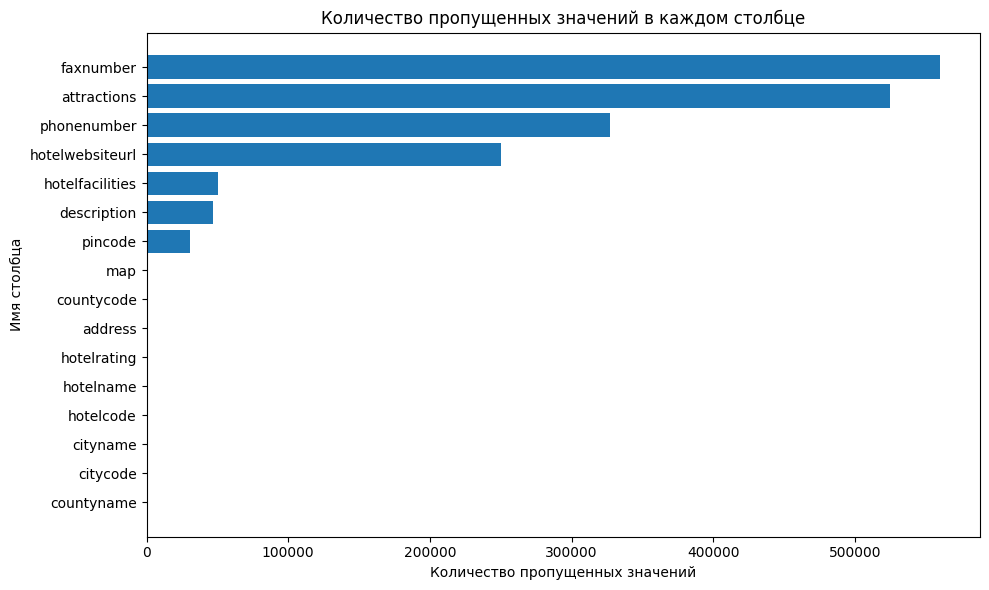

In [8]:
# Создаем список с именами столбцов и количеством пропущенных значений
missing_counts = [df[column].isnull().sum() for column in df.columns]

# Сортируем столбцы в порядке убывания количества пропущенных значений
sorted_columns, sorted_missing_counts = zip(*sorted(zip(df.columns, missing_counts), key=lambda x: x[1], reverse=False))

# Создаем горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
# Используем barh для горизонтальных столбцов
plt.barh(sorted_columns, sorted_missing_counts)  
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Имя столбца')
plt.title('Количество пропущенных значений в каждом столбце')
plt.tight_layout()

# Отображаем график
plt.show()

In [9]:
columns_isnull = [col for col, count in zip(sorted_columns, sorted_missing_counts) if count > 0]
print(f'Названий столбцов, у которых пропуски:')
for col in columns_isnull:
    print('\t' + col)

Названий столбцов, у которых пропуски:
	address
	countycode
	map
	pincode
	description
	hotelfacilities
	hotelwebsiteurl
	phonenumber
	attractions
	faxnumber


Пропущенные значения колонки в основном категориальные, поэтому не получится заполнить их медианой. Можно их удалять, но лучше всего заполнить заглушку как - `unknown`. Если устранить их, то более 50% данных мы потеряем, а это не очень хорошо 

In [10]:
# Устраняем пропуски заглушками
# df[columns_isnull] = df[columns_isnull].fillna('unknown')
df.dropna(inplace=True)

## Дубликаты

In [11]:
# Кол-во дублириющие значения
df.duplicated().sum()

0

## Выбросы - Ящик с усами

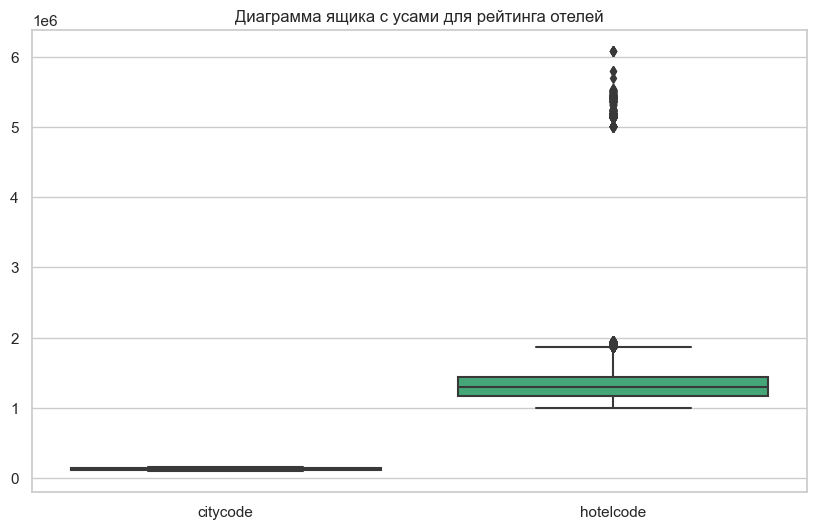

In [12]:
sb.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sb.boxplot(data=df, palette='viridis')

plt.title('Диаграмма ящика с усами для рейтинга отелей')
plt.show()

## Создание новых признаков - высота и ширина

Как и видим, что можно разделить на высоту и ширины с колонки `map` 

In [13]:
df[['map']].head()

map
8     41.34106|19.83108
9     41.32547|19.82503
11    41.33054|19.82281
17    41.31723|19.82361
26  41.332199|19.818794

In [14]:
# Разделение столбца 'map' на два отдельных столбца
df[['latitude', 'longitude']] = df['map'].str.split('|', expand=True)

# Приведение к числовому формату
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

# Удаление столбца 'map
df = df.drop('map', axis=1)

In [15]:
df[['latitude', 'longitude']].head()

latitude  longitude
8   41.341060  19.831080
9   41.325470  19.825030
11  41.330540  19.822810
17  41.317230  19.823610
26  41.332199  19.818794

## Преобразование категорий в числа

In [16]:
# Создаем словарь для соответствия категорий и их кодов
rating_mapping = {
    'OneStar': 1,
    'TwoStar': 2,
    'ThreeStar': 3,
    'FourStar': 4,
    'FiveStar': 5,
    'All': 6
}

# Присваиваем числовые коды
df['hotelrating_encoded'] = df['hotelrating'].map(rating_mapping)

# Анализ данных

## Распределение отелей по кодам стран

In [17]:
# Подсчет количества кодов отелей и сортировка по убыванию
top_countycode = df['countycode'].value_counts().nlargest(20).index

# Фильтрация данных по топовым кодам стран
df_top_countycode = df[df['countycode'].isin(top_countycode)]

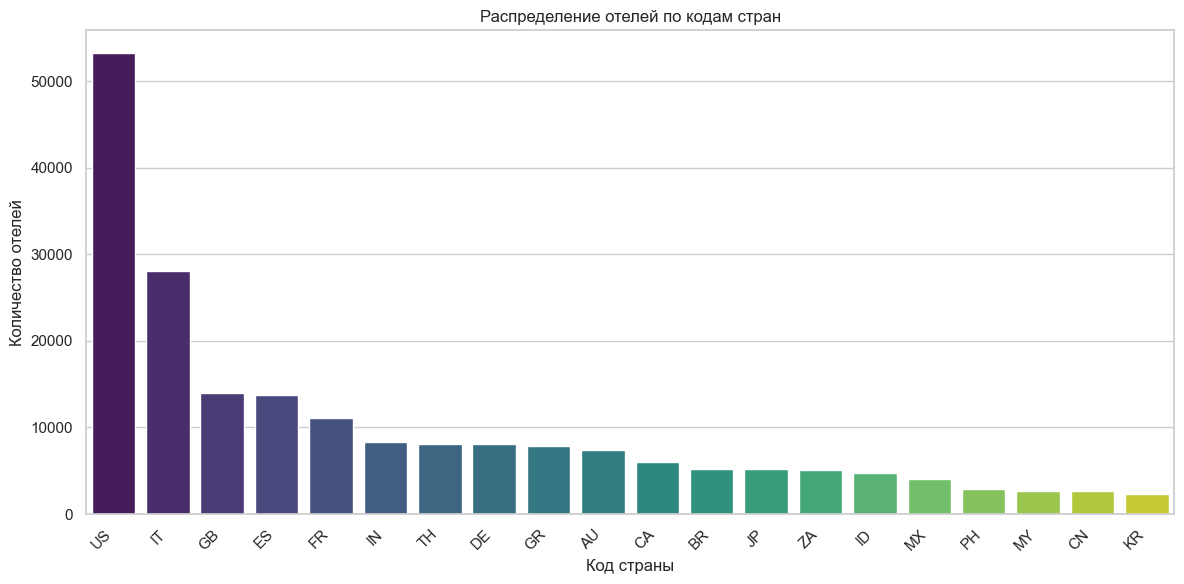

In [18]:
# Установка стиля для графика
sb.set(style="whitegrid")

# Создание диаграммы
plt.figure(figsize=(12, 6))
sb.countplot(x='countycode', data=df_top_countycode, order=top_countycode, palette='viridis')

# Отображение графика
plt.title('Распределение отелей по кодам стран')
plt.xlabel('Код страны')
plt.ylabel('Количество отелей')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X для удобства чтения

# Отобразим график
plt.tight_layout()
plt.show()

Как и видим, что много отелей в Америке и в Италии

## Распределение рейтингов отелей в различных странах

In [19]:
df['countyname'].value_counts()

United States     53198
Italy             28058
United Kingdom    13933
Spain             13761
France            11150
                  ...  
Latvia               10
San Marino           10
Liechtenstein         9
Gibraltar             4
Yemen Republic        1
Name: countyname, Length: 134, dtype: int64

In [20]:
# Подсчет количества отелей в каждой стране и сортировка по убыванию
top_countries = df['countyname'].value_counts().nlargest(20).index

# Фильтрация данных для топ 20 стран
data_top_countries = df[df['countyname'].isin(top_countries)]

# Подсчет количества отелей в каждой стране и сортировка по убыванию
counts_by_city = df['countyname'].value_counts().sort_values(ascending=False).index

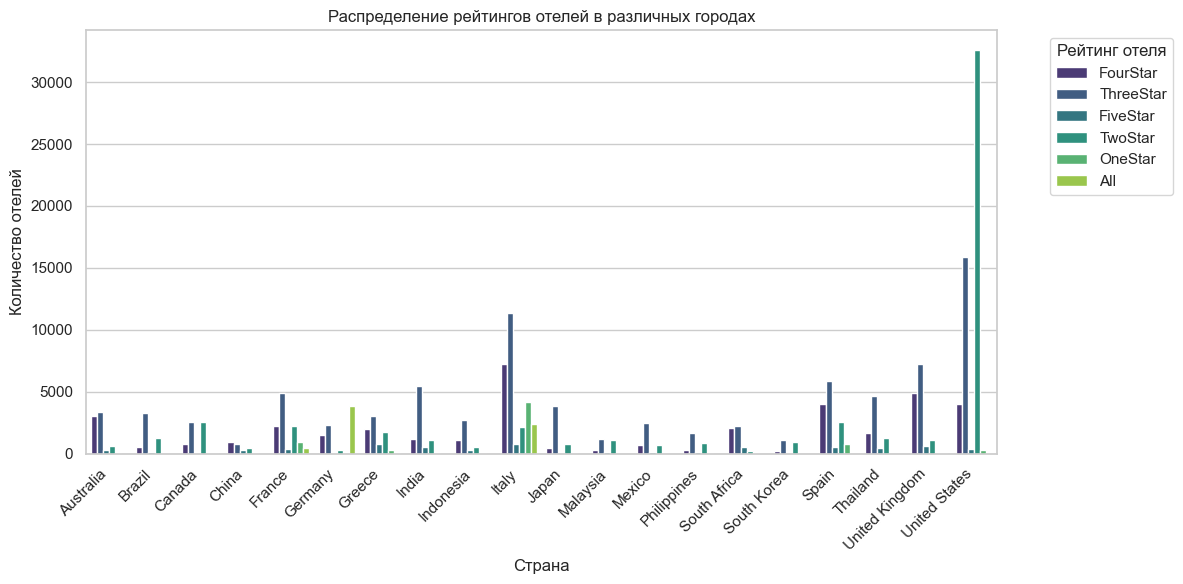

In [21]:
# Установка стиля для графика
sb.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(12, 6))
sb.countplot(data=data_top_countries, x='countyname', hue='hotelrating', palette="viridis")
plt.title('Распределение рейтингов отелей в различных городах')
plt.xlabel('Страна')
plt.ylabel('Количество отелей')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X, чтобы было удобнее читать под углом
plt.legend(title='Рейтинг отеля', bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображение графика
plt.tight_layout()
plt.show()

Как и видим, что в Америке слишком много отелей, у которых рейтинг составляет 2 звездочек. Самым лучшим можно дать Италию, которая сумела сохранить высокий рейтинг

## Распределение рейтингов отелей в различных городах

In [22]:
df['cityname'].value_counts()[:20]

Bali                         1748
Rome                         1547
London                       1281
Phuket                        969
Barcelona                     786
Western Cape                  738
Seoul                         664
British Columbia              657
Los Angeles,   California     655
Goa,   GOA                    637
Johannesburg                  635
Sardinia                      632
Chonburi                      632
Florence                      623
New York,   New York          620
Kuala Lumpur                  610
Canada                        604
Houston,   Texas              576
Pattaya                       566
Chiang Mai                    564
Name: cityname, dtype: int64

In [23]:
# Подсчет количества отелей в каждой стране и сортировка по убыванию
top_countries = df['cityname'].value_counts().nlargest(20).index

# Фильтрация данных для топ 20 стран
data_top_countries = df[df['cityname'].isin(top_countries)]

# Подсчет количества отелей в каждой стране и сортировка по убыванию
counts_by_city = df['cityname'].value_counts().sort_values(ascending=False).index

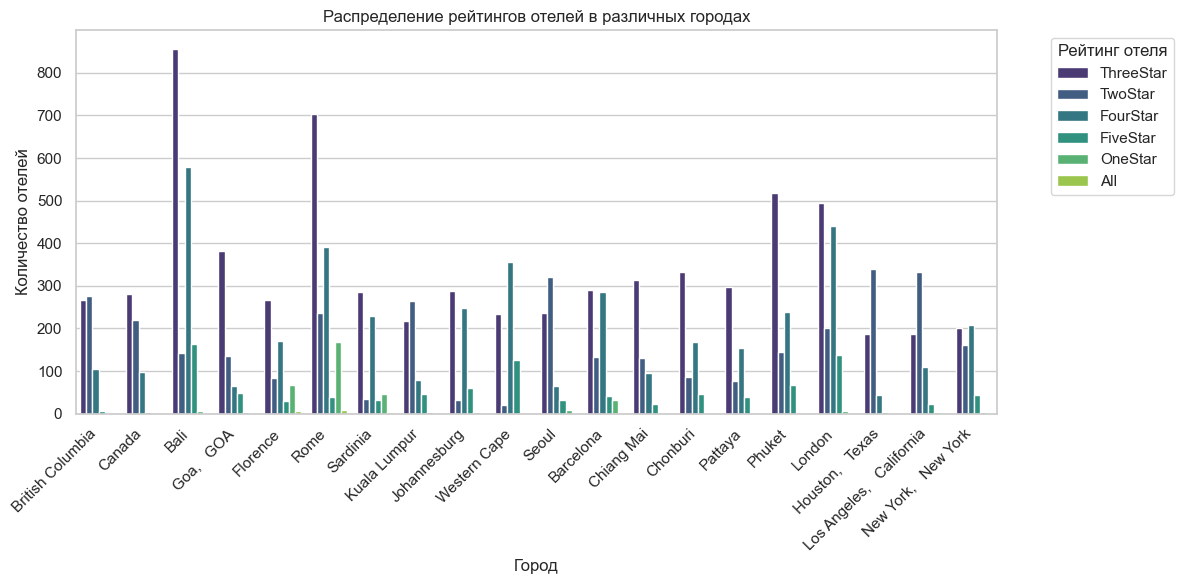

In [24]:
# Установка стиля для графика
sb.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(12, 6))
sb.countplot(data=data_top_countries, x='cityname', hue='hotelrating', palette="viridis")
plt.title('Распределение рейтингов отелей в различных городах')
plt.xlabel('Город')
plt.ylabel('Количество отелей')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X, чтобы было удобнее читать под углом
plt.legend(title='Рейтинг отеля', bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображение графика
plt.tight_layout()
plt.show()

Как и видим, что отель в Бали и Риме оказался лушчим по сравнению с остальными. Пукхет и Лондон тоже не уступает место и занимает неплохие места

## Визуализация концентрация отелей по географической карте

In [25]:
# Создаем базовую карту
hotel_map = folium.Map(location=[41.341060, 19.831080], zoom_start=10)

# Добавляем тепловую карту на основе данных о местоположении отелей
heat_data = [[hotel['latitude'], hotel['longitude']] for index, hotel in df.iterrows()]
HeatMap(heat_data).add_to(hotel_map)

In [26]:
# Отображаем карту
hotel_map

## Проверка гипотез

Рассмотрим следующие гипотезы:

1. **Корреляция между рейтингом отеля и наличием описания:**
   Может быть гипотеза о том, что отели с более подробными описаниями имеют более высокий рейтинг.
   
2. **Влияние географических факторов на наличие описания и удобств:**
   Исследование, есть ли какие-то различия в наличии описания и удобств отелей в зависимости от их местоположения (город, страна).

### Корреляция между рейтингом отеля и наличием описания:

Может быть гипотеза о том, что отели с более подробными описаниями имеют более высокий рейтинг.

- **H0 (нулевая гипотеза)**: Нет статистически значимой корреляции между рейтингом отеля и наличием описания.

- **H1 (альтернативная гипотеза)**: Существует статистически значимая корреляция между рейтингом отеля и наличием описания.

In [27]:
df['hotelrating'].value_counts()

ThreeStar    106192
TwoStar       59590
FourStar      50974
FiveStar       9867
OneStar        7120
All            7107
Name: hotelrating, dtype: int64

In [28]:
# Проведем тест на корреляцию
correlation, p_value = pearsonr(df['hotelrating_encoded'], df['description'].apply(len))

In [29]:
# Уровень значимости
alpha = 0.05

# Вывод результатов
print(f"Корреляция между рейтингом отеля и длиной описания: {correlation:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая корреляция.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой корреляции.")

Корреляция между рейтингом отеля и длиной описания: 0.2414
P-значение: 0.0000
Отвергаем нулевую гипотезу: существует статистически значимая корреляция.


### Влияние географических факторов на наличие описания и удобств:

Исследование, есть ли какие-то различия в наличии описания и удобств отелей в зависимости от их местоположения (город, страна).

- **H0 (нулевая гипотеза):** Нет статистически значимого различия в наличии описания и удобств в отелях в зависимости от географического местоположения.

- **H1 (альтернативная гипотеза):** Существует статистически значимое различие в наличии описания и удобств в отелях в зависимости от географического местоположения.

In [30]:
# Группировка данных по городу и стране
grouped_data = df.groupby(['cityname', 'countyname']).agg({
    'description': 'count',  # подсчет количества описаний
    'hotelfacilities': 'count'  # подсчет количества удобств
}).reset_index()

In [31]:
grouped_data.head()

cityname countyname  description  hotelfacilities
0                          (De) Panne    Belgium            2                2
1  101 Mile House,   British Columbia     Canada           11               11
2                                1770  Australia            1                1
3                 6th of October City      Egypt            5                5
4                            A Coru�a      Spain            6                6

In [32]:
# Проведение теста хи-квадрат
chi2_stat, p_value, _, _ = chi2_contingency(grouped_data[['description', 'hotelfacilities']])

In [33]:
# Вывод результатов
print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

# Уровень значимости
alpha = 0.05

# Вывод результатов теста
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимого различия.")

Хи-квадрат статистика: 0.0000
P-значение: 1.0000
Не отвергаем нулевую гипотезу: нет статистически значимого различия.


## Корреляционная матрица тепловой карты

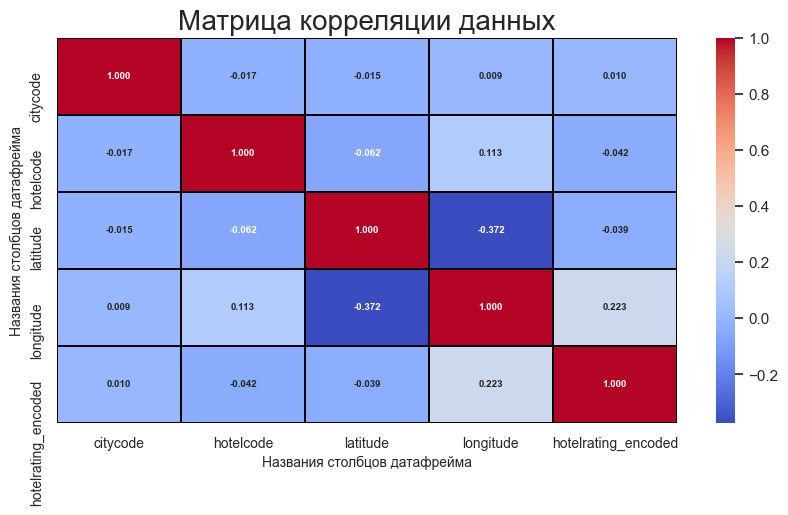

In [34]:
plt.figure(figsize=(10, 5))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df.corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных', fontdict={'size': 20});

plt.show()

Интересно можно заметить, чем выше значение широты (`latitude`), тем ниже рейтинга, но не так критично. А если присмотреться, чем выше значение долготы (`longitude`), тем выше рейтинга. Это можно сделать отсылку на Американского контиента, т.к. обычно они находятся в отритательных широтах и полотижельных долготях. 

# Итог

## Предобработка данных

- Присутствовали огромные пропуски, было решено устранять их. Была мысль заполнять их заглушками, но это можно реализовать, если потребуется

- Дубликатов нет

- Присуствует значительное кол-во выбросов - код отеля

- Создали новые признаки - долгота и ширина, разбив с колонки map

- В ходе предобработки данных было вявлено, что есть колонка, которая дает информацию ближайщих достопримчательности отелей, но однако информация носит HTML формата, что на парсинг уходит много времени и необходимо сопровождать кода. Для тщательного исследования будет полезно

- Также много категориальных признаков, можно преобразовать их в численным через OHE или OH

## Анализ данных

В ходе анализа было выявлено:
- Много отелей можно увидеть в Америке, Италии и другие европейских регионах
- Лучше всего заселиться у Италии, Таиланда или Великобритани, т.к. у них высокие рейтинги
- Самым лучшим городом для отдыха будет: Бали, Рим, Пхукет и Лондом
- По географической карте сразу видно, что много отелей в Еропейских и Американских регонах